# Forecasting GIF

In [1]:
import boto3
import json
import matplotlib.pyplot as plt
import imageio


In [2]:
# AWS credentials to read files on S3 bucket
f = open('../credentials.json')
credentials = json.load(f)

s3_client = boto3.client(
    "s3",
    aws_access_key_id=credentials["Access key ID"],
    aws_secret_access_key=credentials["Secret access key"]
    )

s3_resource = boto3.resource(
    "s3",
    aws_access_key_id=credentials["Access key ID"],
    aws_secret_access_key=credentials["Secret access key"]
    )

In [3]:
prefix_objs = s3_resource.Bucket("cge").objects.filter(Prefix="figures/A/gb/")
keys = [obj.key for obj in prefix_objs]
keys

['figures/A/gb/A_gb_20170418010000',
 'figures/A/gb/A_gb_20170418020000',
 'figures/A/gb/A_gb_20170418030000',
 'figures/A/gb/A_gb_20170418040000',
 'figures/A/gb/A_gb_20170418050000',
 'figures/A/gb/A_gb_20170418060000',
 'figures/A/gb/A_gb_20170418070000',
 'figures/A/gb/A_gb_20170418080000',
 'figures/A/gb/A_gb_20170418090000',
 'figures/A/gb/A_gb_20170418100000',
 'figures/A/gb/A_gb_20170418110000',
 'figures/A/gb/A_gb_20170418120000',
 'figures/A/gb/A_gb_20170418130000',
 'figures/A/gb/A_gb_20170418140000',
 'figures/A/gb/A_gb_20170418150000',
 'figures/A/gb/A_gb_20170418160000',
 'figures/A/gb/A_gb_20170418170000',
 'figures/A/gb/A_gb_20170418180000',
 'figures/A/gb/A_gb_20170418190000',
 'figures/A/gb/A_gb_20170418200000',
 'figures/A/gb/A_gb_20170418210000',
 'figures/A/gb/A_gb_20170418220000',
 'figures/A/gb/A_gb_20170418230000',
 'figures/A/gb/A_gb_20170419000000',
 'figures/A/gb/A_gb_20170419010000',
 'figures/A/gb/A_gb_20170419020000',
 'figures/A/gb/A_gb_20170419030000',
 

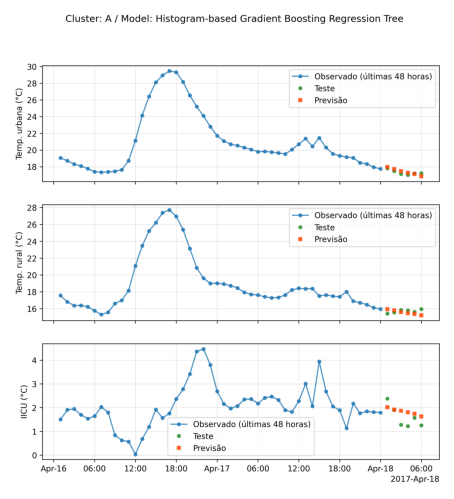

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import boto3
from io import BytesIO

# Configuração do cliente do S3
s3_client = boto3.client('s3')

# Carregar imagens do S3 e armazenar em uma lista
images = []
for filename in keys[:75]:
    obj = s3_client.get_object(Bucket='cge', Key=filename)
    image_data = obj['Body'].read()
    image = plt.imread(BytesIO(image_data), format='png')  # Supondo que são imagens PNG
    images.append(image)

# Configurar a figura para a animação
fig, ax = plt.subplots()

# Função de inicialização para a animação que oculta os eixos
def init():
    ax.imshow(images[0])
    ax.axis('off')  # Desativa os eixos

# Função de animação chamada sequencialmente que oculta os eixos
def animate(i):
    ax.imshow(images[i])
    ax.axis('off')  # Desativa os eixos

# Criação da animação
ani = FuncAnimation(fig, animate, init_func=init, frames=len(images), interval=1500, repeat=False)

# Remover espaços em branco ao redor da imagem
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Salvar a animação
ani.save('my_time_series.mp4', writer='ffmpeg', dpi=300)
